## Title:

### Introduction:

Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project

Identify and describe the dataset that will be used to answer the question

### Preliminary exploratory data analysis:
Demonstrate that the dataset can be read from the web into R 

Clean and wrangle your data into a tidy format

Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

### Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Describe at least one way that you will visualize the results
Expected outcomes and significance:

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?

### Expected outcomes and significance:
What do you expect to find?

What impact could such findings have?

What future questions could this lead to?

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [109]:
# Rana attempting to read data take 1

weather_data_raw <- read_csv("data/daily_weather_2020.csv") %>%
    select(-X1) %>%
     rename(Country = "Country/Region") # remove first column, it only contains the number of rows, will prob need to remove many more cols 
    #filter(Country/Region == "??")

names <- colnames(weather_data_raw) # So that we can see all the column names in the dataframe
count <- weather_data_raw %>%
            group_by(Country) %>%
            summarize(number_of_rows = n()) %>%
            arrange(desc(number_of_rows)) # So that we can see the rows of data we have to work with in each region         

weather_data <- weather_data_raw %>%
                    select(Country, precipProbability, temperatureHigh, temperatureLow, dewPoint, humidity, pressure, precipType) %>%
                    filter(Country == "US") # dataframe with relevant columns from Country w/ most rows (no NAs!)

na_count <- weather_data %>%
                is.na() %>%
                sum() %>%
                as.data.frame() %>%
                rename(number_of_missing = ".") #formally showing number of missing values in a dataframe

#Started a new code cell below because having to scroll all the way down this warning msg is annoying

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  `Country/Region` = col_character(),
  `Province/State` = col_character(),
  time = col_date(format = ""),
  summary = col_character(),
  icon = col_character(),
  precipType = col_character()
)

See spec(...) for full column specifications.

`summarise()` ungrouping output (override with `.groups` argument)



`summarise()` ungrouping output (override with `.groups` argument)



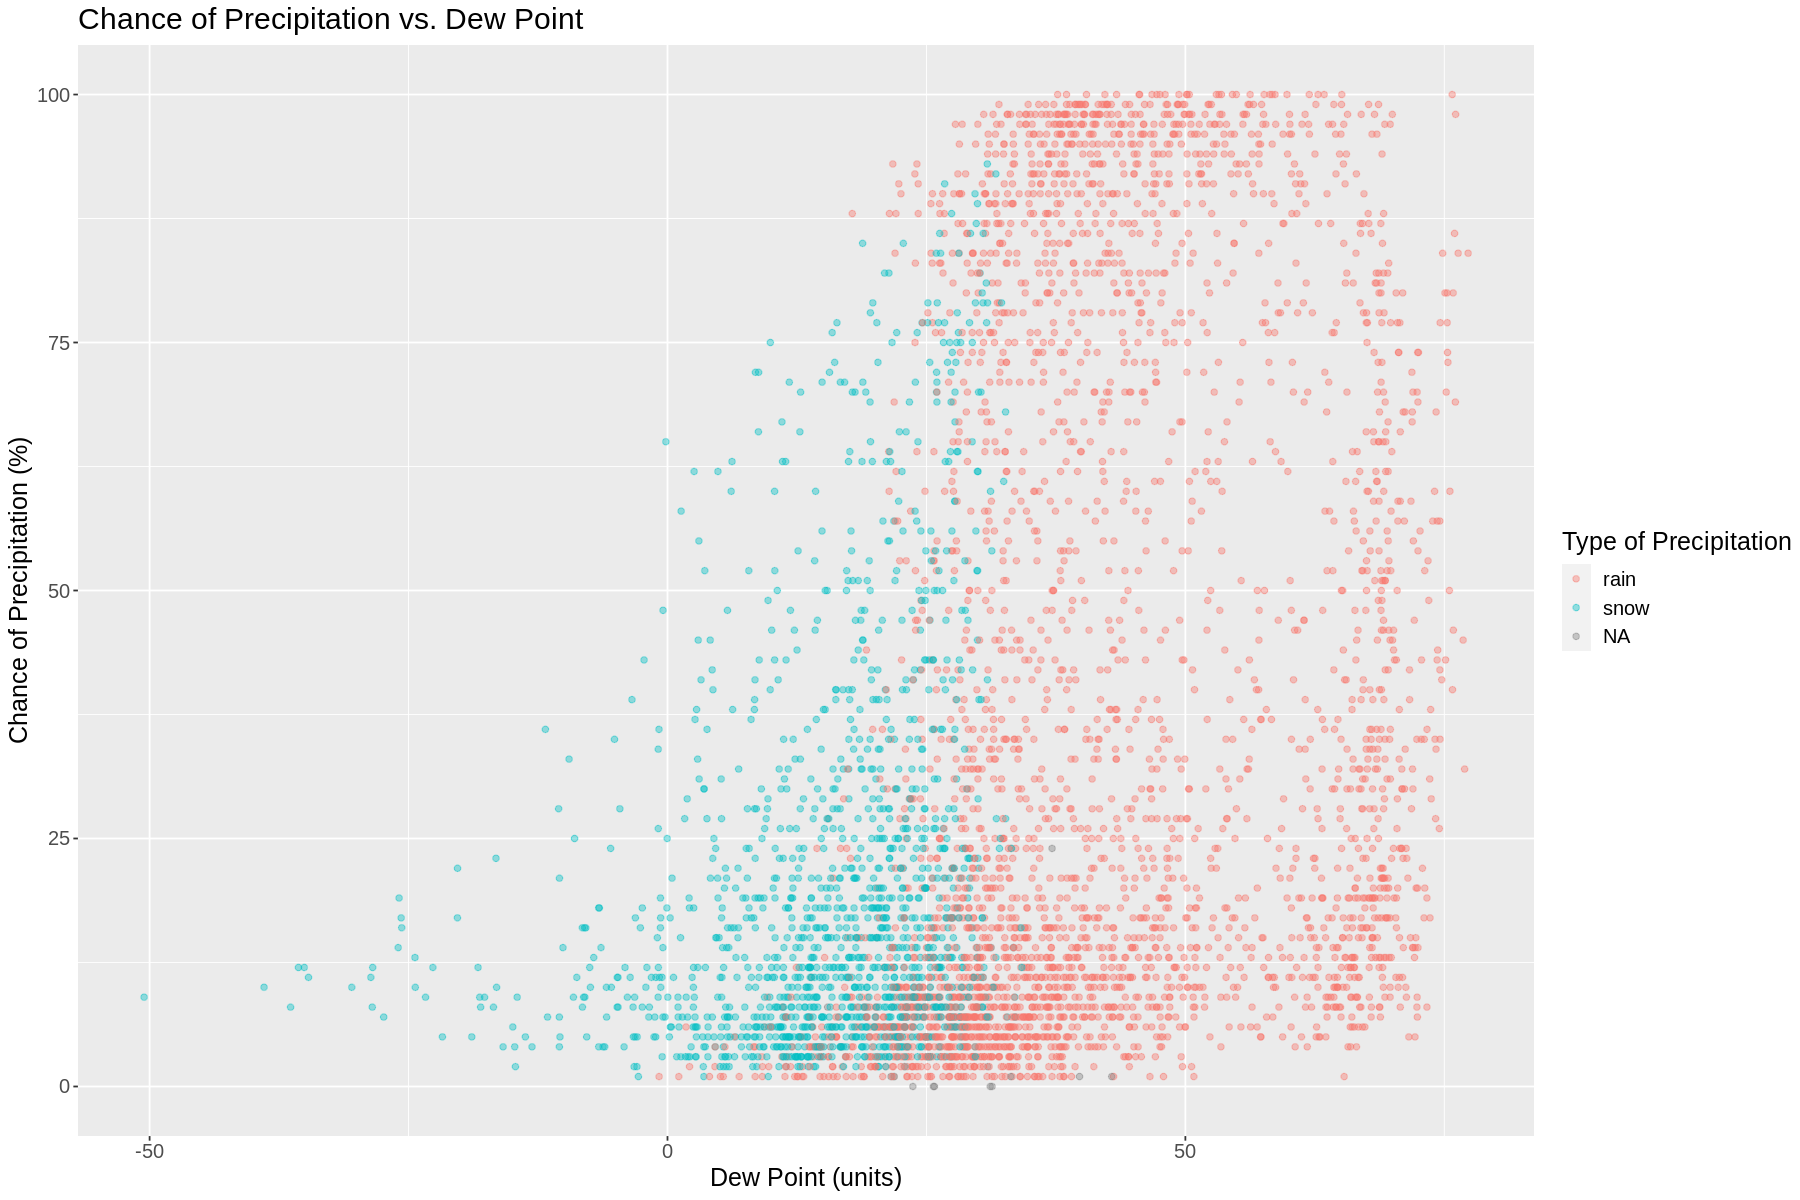

In [129]:
weather_split <- weather_data %>%
                    initial_split(prop = 0.75, strata = precipProbability) #just the thing we have to do to create the split object

weather_training <- training(weather_split) #training dataset
weather_testing <- testing(weather_split) #testing dataset

weather_train_means <- weather_training %>%
                            select(-Country, -precipType) %>%
                            map_df(mean) #computed means for across all columns

weather_train_total <- weather_training %>%
                            group_by(Country) %>%
                            summarize(number_of_rows = n()) #computed total number of rows

weather_train_aggregate <- weather_train_total %>%
                                bind_cols(weather_train_means) #aggregated summary tables for the training data 

options(repr.plot.width = 15, repr.plot.height = 10)
weather_train_plot <- weather_training %>%
                        mutate(precipProbability = precipProbability*100) %>%
                        ggplot(aes(x = dewPoint, y = precipProbability)) +
                        geom_point(aes(colour = precipType), alpha = 0.4) +
                        labs(x = "Dew Point (units)", y = "Chance of Precipitation (%)", colour = "Type of Precipitation") +
                        theme(text = element_text(size = 15)) +
                        ggtitle("Chance of Precipitation vs. Dew Point") 
weather_train_plot
                        

In [88]:
# Planning to maybe have this code cell store the summary tables

unified_tibble <- slice(count, 1) %>%
                    bind_cols(na_count)
unified_tibble

Country number_of_rows number_of_missing
1 US      6272           0